<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - ML Models for Tabular Datasets <br>
<font color=696880 size=4>
    Niloufar Razani 
    
    
____

### Full Name : Yalda Shabanzadeh
### Student Number : 98101822
___

<font face="Times New Roman" size=4><div dir=ltr>
In this homework we are going to implement Adaboost algorithm from scratch. Please read this chapter's <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/tree/main/Jupyter_Notebooks/Chapter_04_Tabular_Data_Models"><font face="Roboto">notebook</font></a> and then complete the #TODO sections. <br>
We will use the heart_disease.csv dataset, which you can see more details about in this <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv"><font face="Roboto">Link</font></a>.
___

# Setup

In [ ]:
import os
from IPython import display
from google.colab import drive

#@markdown Run If you would like to store data in your personal drive.
#@markdown
#@markdown If you run this cell, you will need to authorize Colab to access
#@markdown your personal drive
#@markdown
#@markdown Otherwise, any changes you make will diappear when
#@markdown this Colab's VM restarts after some time of inactivity...
path = 'Machine Learning/HW3/Q1. AdaBoost' #@param

drive.mount('/gdrive')
root = f'/gdrive/My Drive/{path}'
if not os.path.isdir(root):
    os.mkdir(root)
os.chdir(root)
print(f'\nChanged CWD to "{root}"')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).

Changed CWD to "/gdrive/My Drive/Machine Learning/HW3/Q1. AdaBoost"


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Prepration (10 points) 
1.   Load Dataset
2.   Separate target feaure
3.   Change class labels to 1 and -1
4.   Do train-test split

In [ ]:
df = pd.read_csv('heart_disease.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
y = df['target'].copy()
X = df.drop('target', axis=1)

In [ ]:
y = y.replace(0, -1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Adaboost Algorithm Implementation (40 points)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def calculate_error(y, y_pred, w):
    # Calculate the weighted error of a weak classifier.
    return sum(w * (np.not_equal(y, y_pred)).astype(int)) / sum(w)
    

def calculate_alpha(error):
    # Calculate the weight of a weak classifier.
    return np.log((1 - error) / error)
    

def update_weights(w, alpha, y, y_pred):
    # Update weights after a boosting iteration.
    return w * np.exp(alpha * (np.not_equal(y, y_pred)).astype(int))
    

    
class AdaBoost:
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.training_errors = []
        self.prediction_errors = []

    def fit(self, X, y, M=100):
        self.alphas = [] 
        self.training_errors = []
        self.M = M

        for m in range(0, M):
            # Set weights
            if m == 0:
                 w_i = np.ones(len(y)) / len(y)
            else:
                w_i = update_weights(w_i, self.alphas[m - 1], y, y_pred)

            # 1. Fit weak classifier and predict labels(using predict method) and Save it to list of weak classifiers.
            stump = DecisionTreeClassifier(max_depth=1)
            stump.fit(X, y, sample_weight=w_i)
            y_pred = stump.predict(X)
            self.G_M.append(stump)

            # 2. Calculate error of this weak classifier and save it to list of training errors.
            error = calculate_error(y, y_pred, w_i)
            self.training_errors.append(error)

            # 3. Calculate alpha of this weak classifier and save it to list of alphas.
            alpha = calculate_alpha(error)
            self.alphas.append(alpha)

        assert len(self.G_M) == len(self.alphas)


    def predict(self, X):
        weak_preds = pd.DataFrame(index=range(len(X)), columns=range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:, m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)
        return y_pred

### Training and Evaluation (20 points)

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)


def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(
        f'accuracy = {accuracy}',
        f'precision = {precision}',
        f'recall = {recall}',
        f'f1-score = {f1}',
        sep='\n'
    )

In [ ]:
# Fit model
clf = AdaBoost()
clf.fit(X_train, y_train, M=300)

# Predict on test data
y_pred = clf.predict(X_test)


# Print evaluation metrics (Accurcy, Precission, Recall and f-score)
evaluate(y_test, y_pred)

accuracy = 0.8926829268292683
precision = 0.8932038834951457
recall = 0.8932038834951457
f1-score = 0.8932038834951457


In [ ]:
# Do Scikit-Learn implementation of AdaBoost and print evaluation metrics
from sklearn.ensemble import AdaBoostClassifier


sklearn_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), 
    n_estimators=300
)
sklearn_clf.fit(X_train, y_train)
y_pred_sklearn = sklearn_clf.predict(X_test)

In [ ]:
evaluate(y_test, y_pred_sklearn)

accuracy = 0.9317073170731708
precision = 0.9494949494949495
recall = 0.912621359223301
f1-score = 0.9306930693069307


### Early Stopping (15 points)

In [ ]:
# Calculate validation error for different number of estimators
from tqdm import tqdm 
from sklearn.metrics import mean_squared_error


n_estimators = 300
result = dict()
best_clf = None
min_err = np.inf
best_n = -1

for n in tqdm(range(5, n_estimators + 1, 5)):
    clf = AdaBoost()
    clf.fit(X_train, y_train, M=n)
    y_pred = clf.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    result[n] = val_error
    if val_error < min_err:
        min_err = val_error
        best_n = n
        best_clf = clf

100%|██████████| 60/60 [01:15<00:00,  1.26s/it]


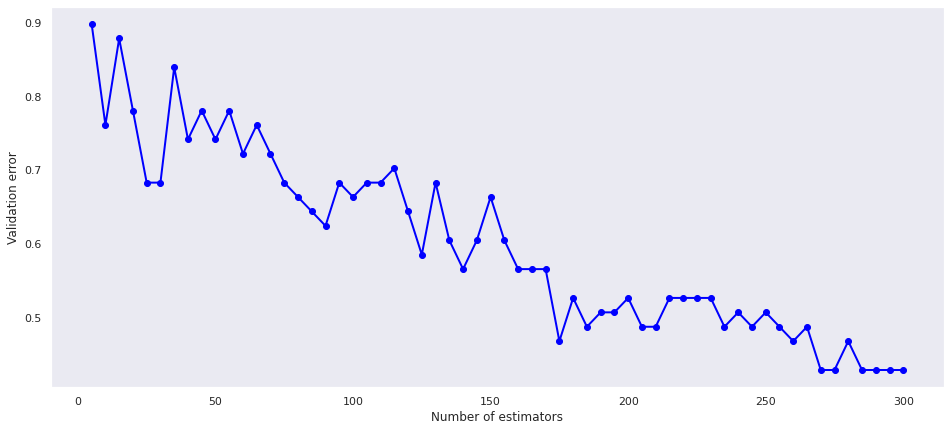

In [ ]:
# Plot validation error versus number of estimators figure.

plt.figure(figsize=(16, 7))
plt.plot(
    list(result.keys()), list(result.values()), 'o-', linewidth=2, color='blue')
plt.xlabel('Number of estimators')
plt.ylabel('Validation error')
plt.show()

In [ ]:
# Print the best number for estimators and minimum value for validation error.

print(f'The best number for estimators is: {best_n}')
print(f'The minimum value for validation error is: {min_err}')

The best number for estimators is: 270
The minimum value for validation error is: 0.4292682926829268


In [ ]:
y_pred = best_clf.predict(X_test)
evaluate(y_test, y_pred)

accuracy = 0.8926829268292683
precision = 0.8932038834951457
recall = 0.8932038834951457
f1-score = 0.8932038834951457


### Weighted Error (10 points)

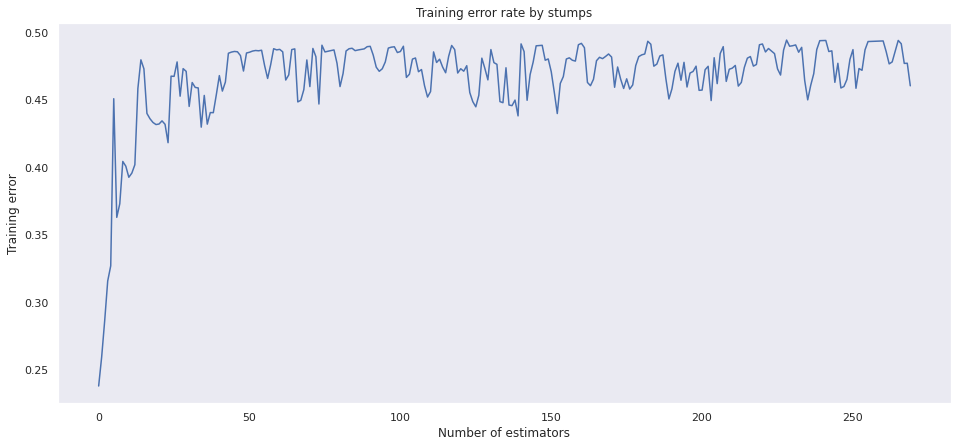

In [ ]:
# Plot weighted training error versus number of estimators figure using training_errors attribute in Adaboost class.

values = best_clf.training_errors
keys = list(range(len(values)))

plt.figure(figsize=(16, 7))
plt.plot(keys, values)
plt.title('Training error rate by stumps')
plt.xlabel('Number of estimators')
plt.ylabel('Training error')
plt.show()

### Question : Why does the weighted error tend to increase as the number of estimators increase? (5points)

> After some iterations, the weights of misclassified samples will be higher and AdaBoost will try to correct them. But it can't classify all samples correctly and their weight will be high, so error will increase.